## Preparing the data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"giciqq","key":"c7aad9a94b458c275cf91184c754ec4b"}'}

In [ ]:
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv ./kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pkdarabi/bone-break-classification-image-dataset

 81% 23.0M/28.4M [00:00<00:00, 115MB/s]
100% 28.4M/28.4M [00:00<00:00, 122MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('bone-break-classification-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Renaming 'Bone Break Classification' manually for 'Bone_Break_Classification'!

In [ ]:
!mkdir /content/Bone_Break_Classification/Bone_Break_Classification/Train/

In [ ]:
!mkdir /content/Bone_Break_Classification/Bone_Break_Classification/Test/

In [ ]:
!mv -v /content/Bone_Break_Classification/Bone_Break_Classification/* /content/Bone_Break_Classification/Bone_Break_Classification/Train

renamed '/content/Bone_Break_Classification/Bone_Break_Classification/Avulsion fracture' -> '/content/Bone_Break_Classification/Bone_Break_Classification/Train/Avulsion fracture'
renamed '/content/Bone_Break_Classification/Bone_Break_Classification/Comminuted fracture' -> '/content/Bone_Break_Classification/Bone_Break_Classification/Train/Comminuted fracture'
renamed '/content/Bone_Break_Classification/Bone_Break_Classification/Fracture Dislocation' -> '/content/Bone_Break_Classification/Bone_Break_Classification/Train/Fracture Dislocation'
renamed '/content/Bone_Break_Classification/Bone_Break_Classification/Greenstick fracture' -> '/content/Bone_Break_Classification/Bone_Break_Classification/Train/Greenstick fracture'
renamed '/content/Bone_Break_Classification/Bone_Break_Classification/Hairline Fracture' -> '/content/Bone_Break_Classification/Bone_Break_Classification/Train/Hairline Fracture'
renamed '/content/Bone_Break_Classification/Bone_Break_Classification/Impacted fracture' ->

In [ ]:
!mv -v /content/Bone_Break_Classification/Bone_Break_Classification/Train/Test /content/Bone_Break_Classification/Bone_Break_Classification/

renamed '/content/Bone_Break_Classification/Bone_Break_Classification/Train/Test' -> '/content/Bone_Break_Classification/Bone_Break_Classification/Test'


In [ ]:
!cp -r /content/Bone_Break_Classification/Bone_Break_Classification/Train/* /content/Bone_Break_Classification/Bone_Break_Classification/Test/

In [ ]:
!rm -r /content/Bone_Break_Classification/Bone_Break_Classification/Train/*/Test

In [ ]:
!rm -r /content/Bone_Break_Classification/Bone_Break_Classification/Test/*/Train

In [ ]:
import os
import shutil
for dirpath, dirnames, filenames in os.walk("Bone_Break_Classification/Bone_Break_Classification"):
    if len(filenames) > 0:
      for filename in filenames:
        source_path = dirpath + '/' + filename
        destination_path = dirpath.rsplit('/', 1)[0] + '/' + filename
        shutil.move(source_path, destination_path)

In [ ]:
!rm -r /content/Bone_Break_Classification/Bone_Break_Classification/Train/*/Train

In [ ]:
!rm -r /content/Bone_Break_Classification/Bone_Break_Classification/Test/*/Test

In [ ]:
for dirpath, dirnames, filenames in os.walk("Bone_Break_Classification/Bone_Break_Classification"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'Bone_Break_Classification/Bone_Break_Classification'
There are 10 directories and 0 images in 'Bone_Break_Classification/Bone_Break_Classification/Train'
There are 0 directories and 68 images in 'Bone_Break_Classification/Bone_Break_Classification/Train/Longitudinal fracture'
There are 0 directories and 137 images in 'Bone_Break_Classification/Bone_Break_Classification/Train/Fracture Dislocation'
There are 0 directories and 101 images in 'Bone_Break_Classification/Bone_Break_Classification/Train/Hairline Fracture'
There are 0 directories and 109 images in 'Bone_Break_Classification/Bone_Break_Classification/Train/Avulsion fracture'
There are 0 directories and 116 images in 'Bone_Break_Classification/Bone_Break_Classification/Train/Pathological fracture'
There are 0 directories and 75 images in 'Bone_Break_Classification/Bone_Break_Classification/Train/Impacted fracture'
There are 0 directories and 134 images in 'Bone_Break_Classification/Bone_Br

In [ ]:
train_dir = "Bone_Break_Classification/Bone_Break_Classification/Train"
test_dir = "Bone_Break_Classification/Bone_Break_Classification/Test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 shuffle=True) # SHUFFLING!
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                shuffle=False) # No shuffling cause of calculating confusion matrix and other metrics

Found 989 files belonging to 10 classes.
Found 140 files belonging to 10 classes.


In [ ]:
train_data.class_names

['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[161.         161.         161.        ]
   [159.9847     159.9847     159.9847    ]
   [171.90306    171.90306    171.90306   ]
   ...
   [ 17.760271    17.760271    17.760271  ]
   [ 22.341845    22.341845    22.341845  ]
   [ 20.071384    20.071384    20.071384  ]]

  [[161.92857    161.92857    161.92857   ]
   [159.64285    159.64285    159.64285   ]
   [158.20918    158.20918    158.20918   ]
   ...
   [ 21.647966    21.647966    21.647966  ]
   [ 21.61734     21.61734     21.61734   ]
   [ 19.499956    19.499956    19.499956  ]]

  [[160.33163    160.33163    160.33163   ]
   [158.57143    158.57143    158.57143   ]
   [162.9847     162.9847     162.9847    ]
   ...
   [ 19.357107    19.357107    19.357107  ]
   [ 18.852045    18.852045    18.852045  ]
   [ 21.40309     21.40309     21.40309   ]]

  ...

  [[ 22.954084    22.954084    22.954084  ]
   [ 24.642822    24.642822    24.642822  ]
   [ 22.586758    22.586758    22.586758  ]
   ...
   [ 17.          17.   

(-0.5, 639.5, 639.5, -0.5)

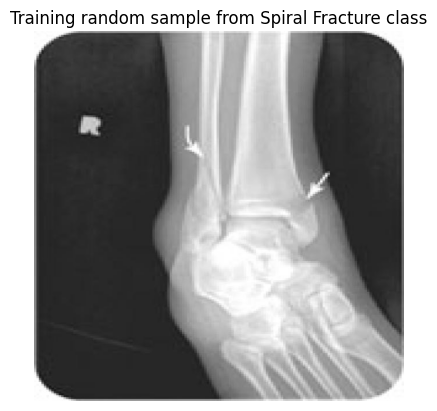

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
target_class = random.choice(train_data.class_names)
target_dir = "Bone_Break_Classification/Bone_Break_Classification/Train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Training random sample from {target_class} class")
plt.axis(False)

In [ ]:
img.shape

(640, 640, 3)

## Simple CNN model

In [ ]:
from tensorflow.keras import layers

In [ ]:
# Creating a base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) # RESCALING!
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                             

In [ ]:
# EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [ ]:
model_0.fit(train_data,
            epochs=300,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[early_stopping, reduce_lr])

Epoch 1/300
31/31 [==============================] - 21s 333ms/step - loss: 2.2932 - accuracy: 0.1294 - val_loss: 2.3118 - val_accuracy: 0.0929 - lr: 0.0010
Epoch 2/300
31/31 [==============================] - 4s 118ms/step - loss: 2.2676 - accuracy: 0.1466 - val_loss: 2.2957 - val_accuracy: 0.1357 - lr: 0.0010
Epoch 3/300
31/31 [==============================] - 4s 119ms/step - loss: 2.2116 - accuracy: 0.1871 - val_loss: 2.2936 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 4/300
31/31 [==============================] - 4s 122ms/step - loss: 2.1500 - accuracy: 0.2275 - val_loss: 2.3500 - val_accuracy: 0.1714 - lr: 0.0010
Epoch 5/300
31/31 [==============================] - ETA: 0s - loss: 2.0618 - accuracy: 0.2639
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
31/31 [==============================] - 4s 119ms/step - loss: 2.0618 - accuracy: 0.2639 - val_loss: 2.4912 - val_accuracy: 0.1571 - lr: 0.0010
Epoch 6/300
31/31 [==============================] - 4s 132

In [ ]:
model_0.evaluate(test_data)

5/5 [==============================] - 0s 40ms/step - loss: 2.5560 - accuracy: 0.2071


[2.5560340881347656, 0.20714285969734192]

## Transfer Learning: Feature Extraction Model (EfficientNetV2) with data augmentation

In [ ]:
max_height = 0
max_width = 0
min_height = 640
min_width = 640
for dirpath, dirnames, filenames in os.walk("Bone_Break_Classification/Bone_Break_Classification"):
  if len(filenames) > 0:
    for filename in filenames:
      path = dirpath + '/' + filename
      img = mpimg.imread(path)
      if img.shape[0] > max_height:
        max_height = img.shape[0]
      if img.shape[1] > max_width:
        max_width = img.shape[1]
      if img.shape[0] < min_height:
        min_height = img.shape[0]
      if img.shape[1] < min_width:
        min_width = img.shape[1]

print(max_height, max_width, min_height, min_width)

640 640 77 58


In [ ]:
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 shuffle=True) # SHUFFLING!
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 shuffle=False) # No shuffling cause of calculating confusion matrix and other metrics

Found 989 files belonging to 10 classes.
Found 140 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
]
    ,name="data_augmentation")

In [ ]:
# Weights link:
#!wget https://github.com/fchollet/deep-learning-models/releases/download/v0.6/mobilenet_2_5_224_tf.h5

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=IMG_SIZE+(3,), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="GAP2D")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_feature_extraction = tf.keras.Model(inputs, outputs)

24274472/24274472 [==============================] - 0s 0us/step


In [ ]:
IMG_SIZE+(3,)

(224, 224, 3)

In [ ]:
checkpoint_path = "feature_extraction/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
model_feature_extraction.compile(loss="categorical_crossentropy",
                                 optimizer=tf.keras.optimizers.Adam(),
                                 metrics=["accuracy"])
history_1 = model_feature_extraction.fit(train_data,
                             epochs=11,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data),
                             callbacks=[checkpoint_callback])

Epoch 1/11
31/31 [==============================] - ETA: 0s - loss: 2.2760 - accuracy: 0.1618
Epoch 1: val_loss improved from inf to 2.24493, saving model to feature_extraction/checkpoint.ckpt
31/31 [==============================] - 49s 1s/step - loss: 2.2760 - accuracy: 0.1618 - val_loss: 2.2449 - val_accuracy: 0.1786
Epoch 2/11
31/31 [==============================] - ETA: 0s - loss: 2.0859 - accuracy: 0.2639
Epoch 2: val_loss improved from 2.24493 to 2.16314, saving model to feature_extraction/checkpoint.ckpt
31/31 [==============================] - 30s 953ms/step - loss: 2.0859 - accuracy: 0.2639 - val_loss: 2.1631 - val_accuracy: 0.2429
Epoch 3/11
31/31 [==============================] - ETA: 0s - loss: 1.9980 - accuracy: 0.3276
Epoch 3: val_loss improved from 2.16314 to 2.10142, saving model to feature_extraction/checkpoint.ckpt
31/31 [==============================] - 28s 897ms/step - loss: 1.9980 - accuracy: 0.3276 - val_loss: 2.1014 - val_accuracy: 0.2643
Epoch 4/11
31/31 [==

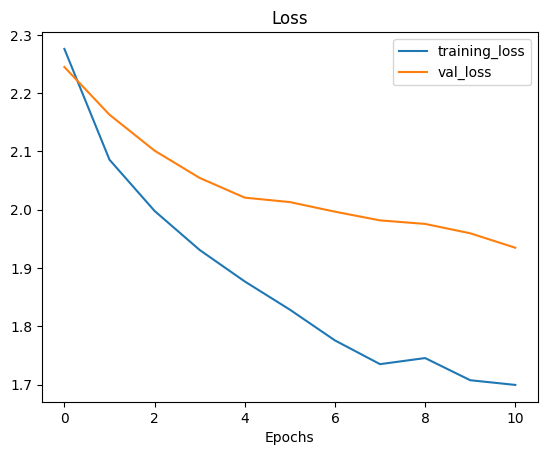

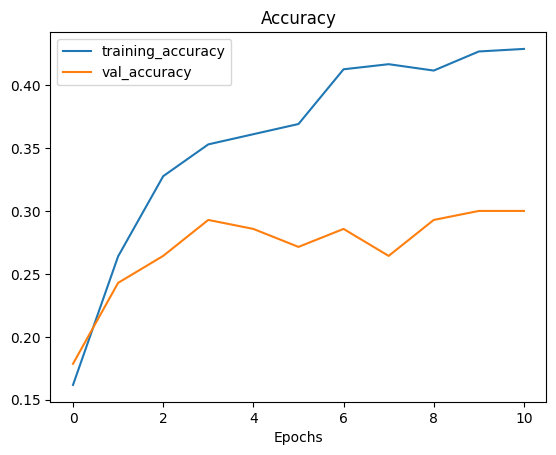

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(model_feature_extraction.history)

In [ ]:
model_feature_extraction.evaluate(test_data)

5/5 [==============================] - 0s 79ms/step - loss: 1.9349 - accuracy: 0.3000


[1.934875726699829, 0.30000001192092896]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling_1 False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fa

In [ ]:
model_feature_extraction.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 GAP2D (GlobalAveragePoolin  (None, 1280)              0         
 g2D)                                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
initial_epochs = 11

In [ ]:
len(train_data)*32

992

In [ ]:
len(test_data)*32

160

In [ ]:
pred_probs = model_feature_extraction.predict(test_data)
pred_probs

5/5 [==============================] - 2s 66ms/step


array([[0.21609089, 0.01712846, 0.26009142, ..., 0.01854428, 0.29766712,
        0.02530141],
       [0.37191153, 0.0915876 , 0.05685615, ..., 0.06868486, 0.01410489,
        0.0425094 ],
       [0.05530973, 0.04102897, 0.07395066, ..., 0.08181885, 0.02403154,
        0.0105396 ],
       ...,
       [0.11936601, 0.2602498 , 0.09590209, ..., 0.09634925, 0.10771641,
        0.10628218],
       [0.10652134, 0.06256118, 0.09060526, ..., 0.12583606, 0.09358007,
        0.19367938],
       [0.01539121, 0.03632809, 0.0018272 , ..., 0.00948158, 0.7644133 ,
        0.14937563]], dtype=float32)

In [ ]:
preds = pred_probs.argmax(axis=-1)
preds

array([8, 0, 4, 0, 0, 4, 0, 0, 1, 0, 0, 0, 8, 8, 0, 2, 0, 8, 1, 8, 1, 1,
       1, 8, 8, 8, 1, 1, 0, 3, 2, 0, 2, 2, 4, 4, 0, 3, 9, 0, 5, 2, 3, 3,
       3, 5, 1, 3, 3, 3, 3, 1, 3, 8, 3, 3, 8, 2, 3, 2, 3, 3, 3, 0, 1, 6,
       0, 0, 0, 3, 4, 1, 1, 4, 0, 2, 2, 8, 8, 7, 1, 8, 0, 5, 8, 0, 0, 2,
       8, 0, 9, 3, 0, 3, 1, 7, 3, 8, 1, 0, 5, 2, 0, 3, 1, 4, 0, 3, 8, 0,
       8, 8, 9, 6, 8, 8, 8, 8, 0, 2, 1, 1, 8, 8, 8, 8, 5, 5, 3, 3, 8, 3,
       3, 8, 8, 2, 8, 1, 9, 8])

In [ ]:
true = []
for image, label in test_data.unbatch():
  true.append(label.numpy().argmax(axis=-1))

In [ ]:
import numpy as np
true = np.array(true)
true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

<Axes: >

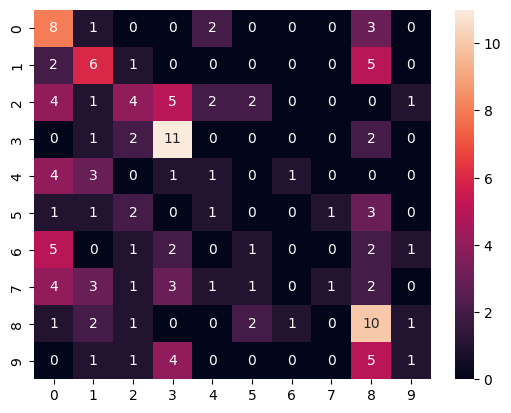

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(true, preds)
sn.heatmap(cm, annot=True)

## Transfer Learning: Fine-tuning the model

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_1 False
rescaling_1 False
normalization False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape False
block

In [ ]:
print(len(model_feature_extraction.layers[1].trainable_variables))

0


In [ ]:
model_feature_extraction.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), # lowering lr with fine-tuning!; 10 times less
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 3

history_fine_tuning= model_feature_extraction.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=len(test_data),
                                               initial_epoch=history_1.epoch[-1] # Start from previous last epoch
                                               )

Epoch 11/14
31/31 [==============================] - 29s 607ms/step - loss: 1.6613 - accuracy: 0.4429 - val_loss: 1.9449 - val_accuracy: 0.2929
Epoch 12/14
31/31 [==============================] - 17s 532ms/step - loss: 1.6225 - accuracy: 0.4631 - val_loss: 1.9899 - val_accuracy: 0.3143
Epoch 13/14
31/31 [==============================] - 17s 523ms/step - loss: 1.6063 - accuracy: 0.4499 - val_loss: 1.9744 - val_accuracy: 0.3429
Epoch 14/14
31/31 [==============================] - 13s 420ms/step - loss: 1.5895 - accuracy: 0.4651 - val_loss: 1.9454 - val_accuracy: 0.3214


In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

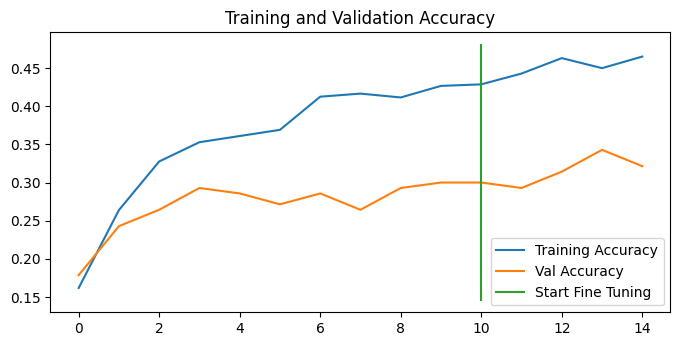

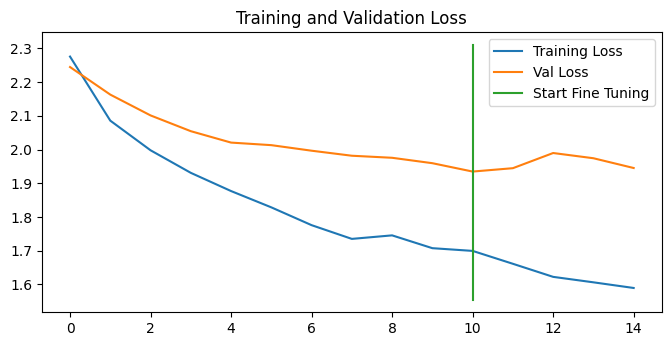

In [ ]:
compare_historys(history_1, history_fine_tuning, initial_epochs=initial_epochs)

In [ ]:
model_feature_extraction.evaluate(test_data)

5/5 [==============================] - 0s 47ms/step - loss: 1.9454 - accuracy: 0.3214


[1.945430040359497, 0.3214285671710968]

In [ ]:
pred_probs = model_feature_extraction.predict(test_data)
pred_probs

5/5 [==============================] - 2s 56ms/step


array([[2.49715313e-01, 8.58538598e-03, 2.69789368e-01, ...,
        1.01646055e-02, 3.13142329e-01, 1.88341588e-02],
       [4.00630534e-01, 4.51003872e-02, 4.31564152e-02, ...,
        4.93224971e-02, 5.14680799e-03, 3.61282565e-02],
       [3.17266658e-02, 1.34835104e-02, 6.16605803e-02, ...,
        5.04368208e-02, 9.08833370e-03, 5.05945878e-03],
       ...,
       [1.18894704e-01, 2.56989866e-01, 8.02055821e-02, ...,
        8.09346363e-02, 9.46839228e-02, 1.53219059e-01],
       [8.05131197e-02, 3.63388844e-02, 8.91584083e-02, ...,
        1.10492505e-01, 5.09610400e-02, 3.34500581e-01],
       [4.88078129e-03, 1.76566355e-02, 3.86085361e-04, ...,
        3.38052982e-03, 8.31996262e-01, 1.32543549e-01]], dtype=float32)

In [ ]:
preds = pred_probs.argmax(axis=-1)
preds

array([8, 0, 4, 0, 0, 4, 0, 0, 1, 0, 0, 4, 8, 8, 0, 1, 0, 8, 1, 8, 1, 1,
       1, 8, 8, 6, 1, 1, 2, 8, 2, 0, 2, 2, 4, 4, 0, 3, 9, 0, 5, 2, 3, 3,
       3, 5, 1, 3, 3, 3, 3, 5, 3, 8, 3, 3, 8, 3, 3, 2, 3, 3, 3, 0, 6, 6,
       0, 0, 0, 3, 4, 1, 6, 4, 0, 2, 2, 8, 8, 7, 1, 8, 0, 5, 8, 9, 0, 4,
       8, 0, 9, 3, 9, 3, 5, 7, 3, 8, 1, 0, 6, 2, 0, 3, 9, 4, 0, 3, 8, 9,
       8, 8, 9, 6, 8, 8, 8, 8, 5, 2, 2, 1, 8, 8, 8, 8, 9, 5, 3, 9, 8, 3,
       3, 6, 8, 2, 8, 1, 9, 8])

In [ ]:
true = []
for image, label in test_data.unbatch():
  true.append(label.numpy().argmax(axis=-1))

In [ ]:
true = np.array(true)
true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

<Axes: >

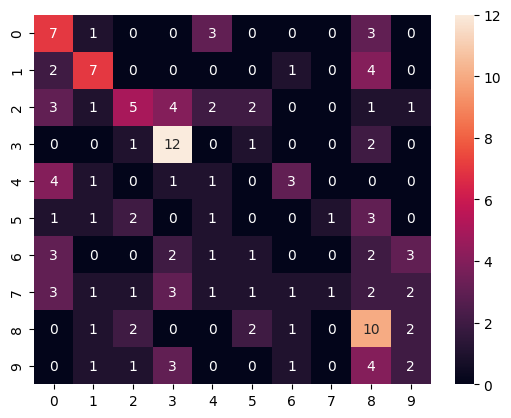

In [ ]:
cm = confusion_matrix(true, preds)
sn.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
accuracy = accuracy_score(true, preds)
precision, recall, f1_score, _ = precision_recall_fscore_support(true, preds, average="weighted")

In [ ]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1_score}")

Accuracy: 0.32142857142857145
Precision: 0.31553642111355995
Recall: 0.32142857142857145
F1-score: 0.2867953537710852
